In [1]:
# 6.2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

In [2]:
mu0 = 1.9
t20 = 0.95**2
s20 = 0.01
nu0 = 1

y = np.array([1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08])

G = 100
H = 100

In [3]:
mean_grid = np.linspace(1.505, 2.00, num=G)
prec_grid = np.linspace(1.75, 175, num=H)
post_grid = np.zeros(shape=(G, H))
X, Y = np.meshgrid(mean_grid, prec_grid)

In [4]:
for ix, m in enumerate(mean_grid):
    for jx, p in enumerate(prec_grid):
        normal_prior = norm.pdf(m, mu0, np.sqrt(t20))
        gamma_prior = gamma.pdf(p, a=nu0/2, scale=2/(s20*nu0))
        sampling_dist = norm.pdf(y, m, 1/np.sqrt(p))
        post_value = normal_prior * gamma_prior * np.cumprod(sampling_dist)[-1]
        post_grid[jx, ix] = post_value

post_grid = post_grid / np.sum(post_grid)

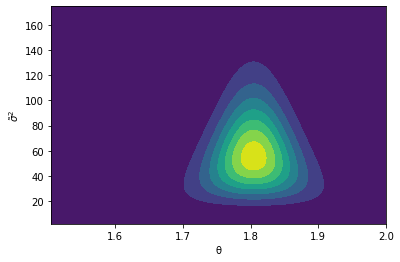

In [5]:
cp = plt.contourf(X, Y, post_grid)
plt.xlabel('\u03B8');
plt.ylabel(r"$\~\sigma^2$");

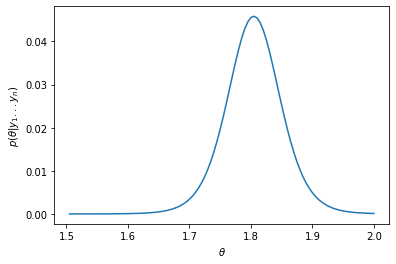

In [6]:
plt.plot(mean_grid, post_grid.sum(axis=0));
plt.xlabel(r"$\theta$");
plt.ylabel(r"$p(\theta|y_1...y_n)$");

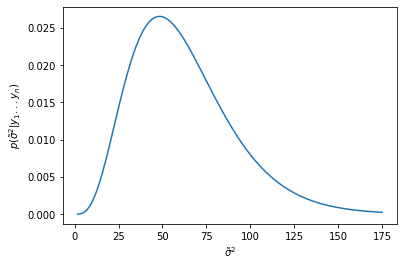

In [7]:
plt.plot(prec_grid, post_grid.sum(axis=1));
plt.xlabel(r"$\~\sigma^2$");
plt.ylabel(r"$p(\~\sigma^2|y_1...y_n)$");